In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib  import * 
from scipy import stats
import plotly.express as px
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("DataTrained/avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
# Looking for NaN
display(df.isnull().any())

Unnamed: 0      True
Date            True
AveragePrice    True
Total Volume    True
4046            True
4225            True
4770            True
Total Bags      True
Small Bags      True
Large Bags      True
XLarge Bags     True
type            True
year            True
region          True
dtype: bool

In [5]:
df.shape

(16468, 14)

#### selecting all rows with NaN under entire DataFrame

In [6]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Removes all the rows which have NaNs 
df=df.dropna()

In [8]:
# Looking for NaN
display(df.isnull().any())

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [9]:
df.shape

(1517, 14)

In [10]:
#we drop Unnamed column beacuse it just kind of id which have no effect on dataset
df.drop('Unnamed: 0',inplace=True,axis=1)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


##### Extract the Month from DOB into separate column

In [12]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11


In [13]:
df['Date'] = pd.DatetimeIndex(df['Date']).day

##### finding how much type of avacado is sell year wise

In [14]:
df.groupby('year')['type'].value_counts()

year    type        
2015.0  conventional    1270
2016.0  conventional     247
Name: type, dtype: int64

#### total no of sale in each year


In [15]:
df.groupby('year')['Total Volume'].count()

year
2015.0    1270
2016.0     247
Name: Total Volume, dtype: int64

In [16]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11


##### checking ratio of year and price that which year had max average price

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

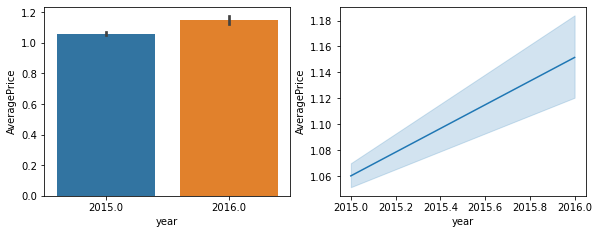

In [17]:
plt.figure(figsize=(15,16))
plt.subplot(4,3,1)
sns.barplot(x = "year" , y = "AveragePrice" ,data=df )
plt.subplot(4,3,2)
sns.lineplot(x = 'year', y = 'AveragePrice', data=df)


so above graph we can see that 2016 year is the year where max average price is there

<AxesSubplot:xlabel='AveragePrice'>

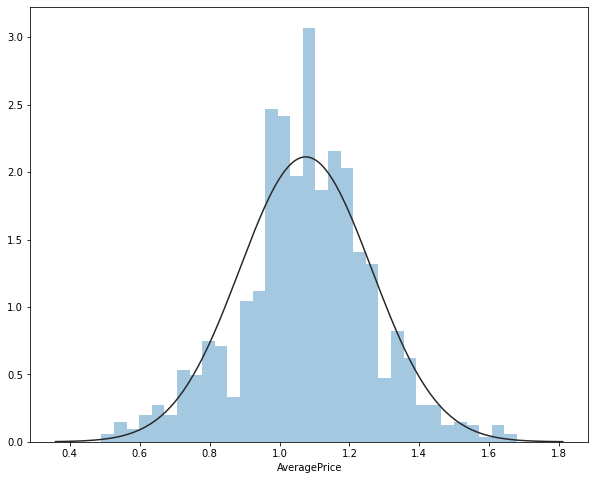

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Average Price distribution shows that for most cases price of avocado is between 1.0, 1.2.

#### checking ratio of month and price that which had max average price



<AxesSubplot:title={'center':' ratio of month and price'}, xlabel='Month', ylabel='AveragePrice'>

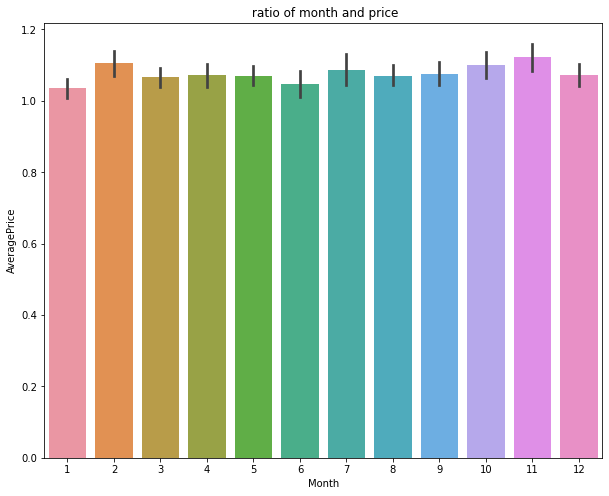

In [19]:
plt.figure(figsize=(10,8))
plt.title(" ratio of month and price")
sns.barplot(x = "Month" , y = "AveragePrice" ,data=df )


Text(0.5, 1.0, 'Average Price Per Month')

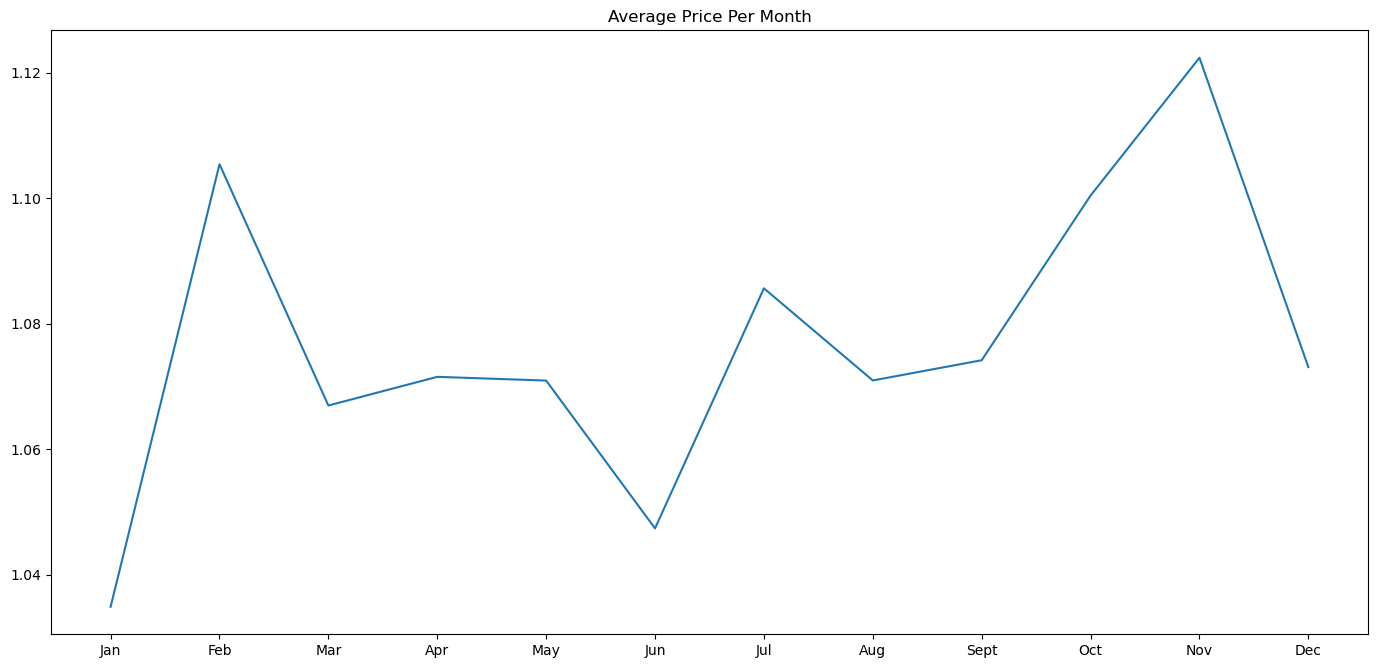

In [20]:
byMonth = df.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

February,October and November are the month where max no of average price is there

Text(0.5, 1.0, 'Average Price Per Day')

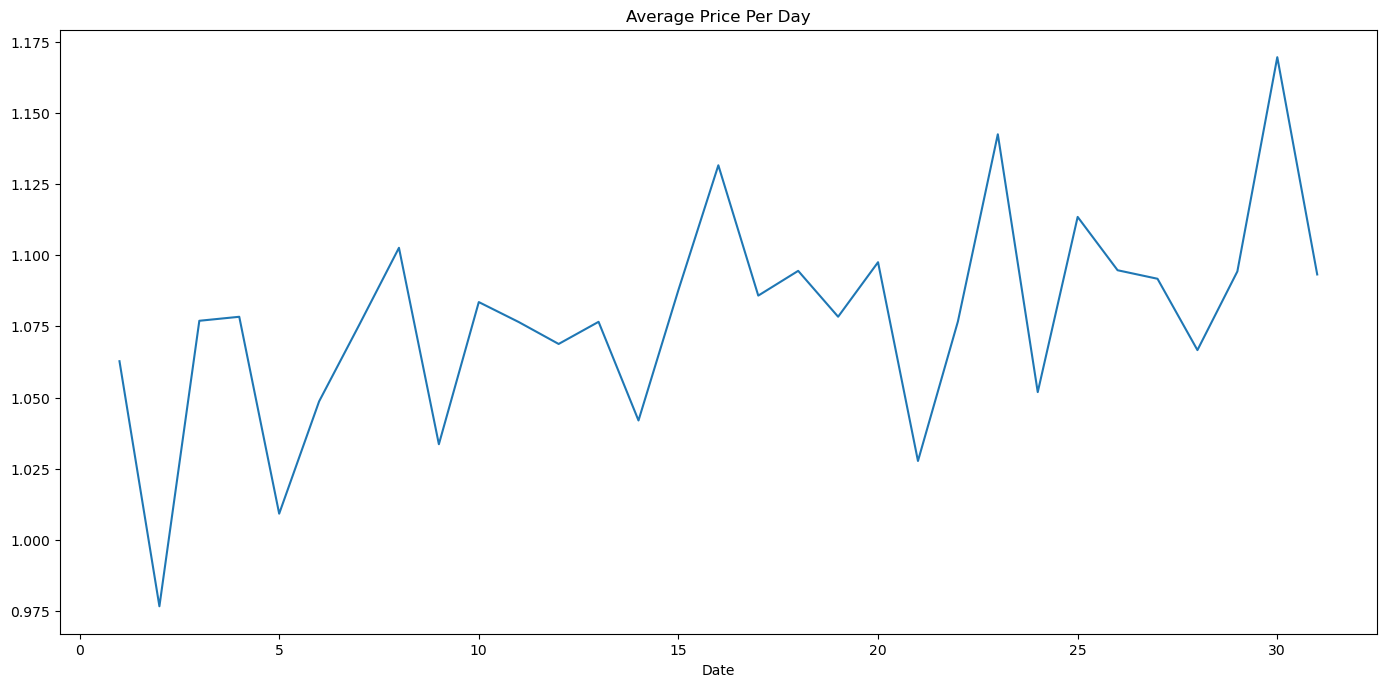

In [21]:
byDay = df.groupby("Date").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

##### ratio of Price with respect to Region

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

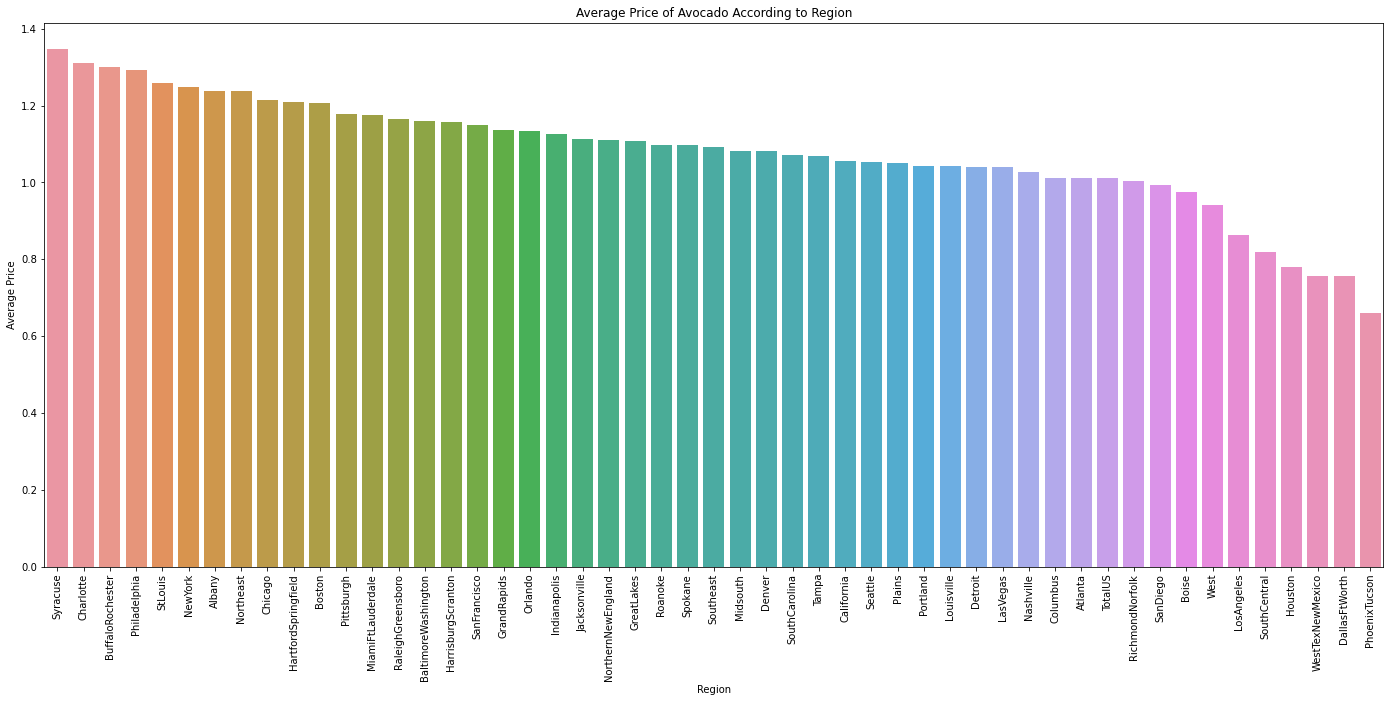

In [22]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

From above plot we can see that Syracuse,charlotte, BuffaloRochester and Philadelphia having more average price as compared to other region

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

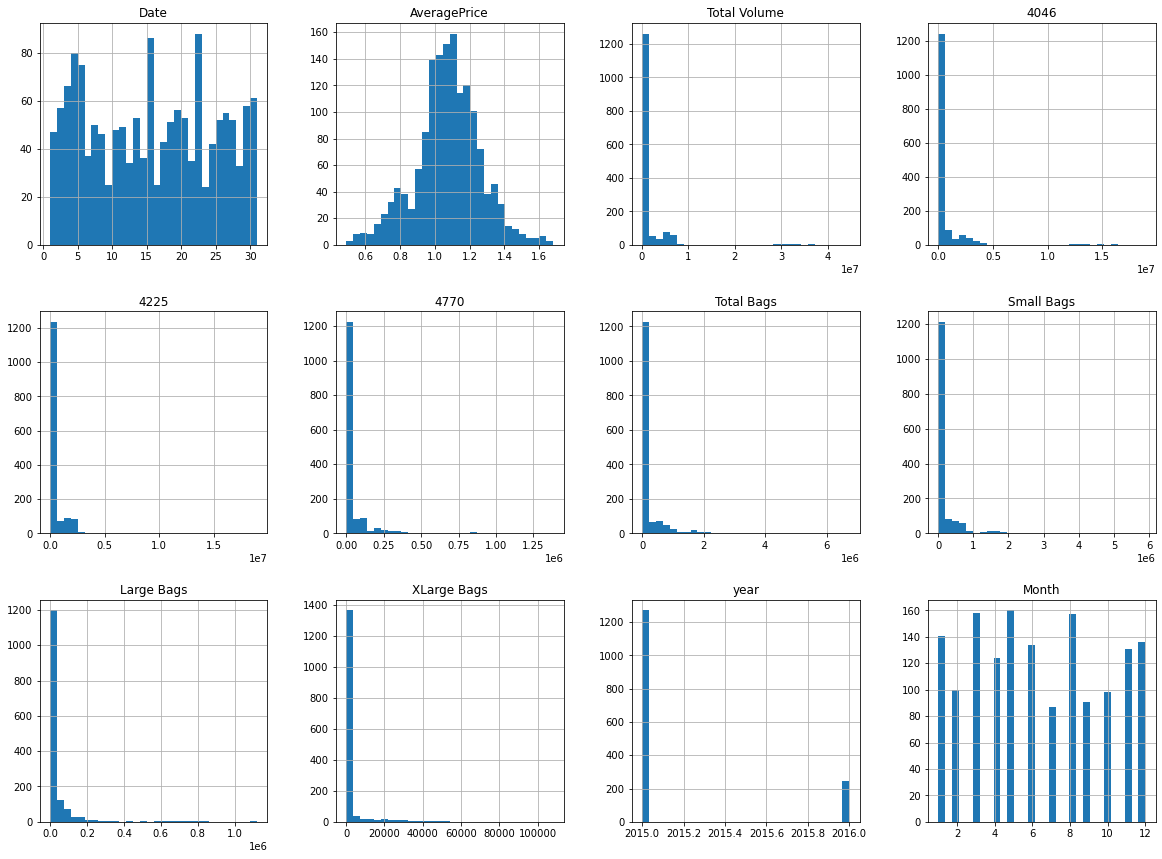

In [23]:
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [24]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,15.253790,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558
std,8.965902,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146
min,1.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000
25%,7.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000
50%,15.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000
75%,22.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000
max,31.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000


### Outliers and Handling Outliers

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
Month           AxesSubplot(0.285345,0.321957;0.133621x0.16413)
dtype: object

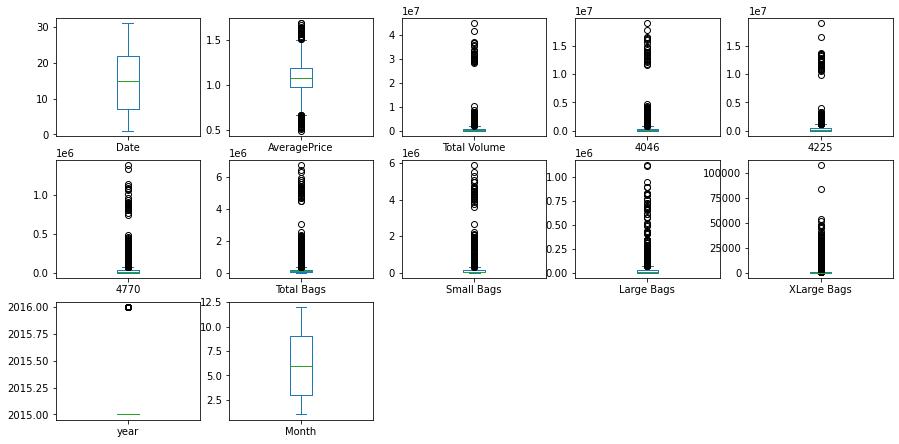

In [25]:
df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

### Before we go on to taking care of the outliers we removed the "Date" variable from our dataset as it is useless now.

In [26]:
df.drop(columns=["Date"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   float64
 11  region        1517 non-null   object 
 12  Month         1517 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 165.9+ KB


In [27]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        #defining quartiles
        quartiles = percentile(df[j], [25,75])
        # calculate min/max
        lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
        upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
        df[j] = df[j].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

The data points that are lesser than the 25th percentile are replaced with the 25th percentile value and the data points that are greater than the 75th percentile are replaced with 75th percentile value.

In [28]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11


AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Month              AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

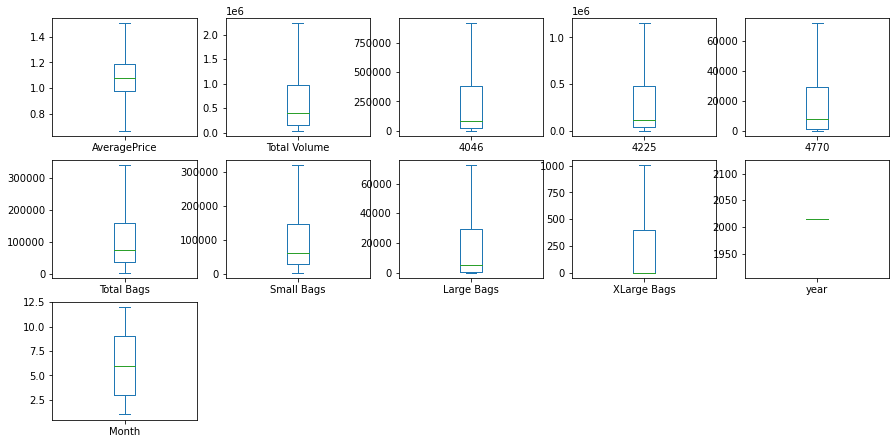

In [29]:
df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

##### percentage of outliers in every columns

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [31]:
((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())/1517)*100

4046            0.0
4225            0.0
4770            0.0
AveragePrice    0.0
Large Bags      0.0
Month           0.0
Small Bags      0.0
Total Bags      0.0
Total Volume    0.0
XLarge Bags     0.0
region          0.0
type            0.0
year            0.0
dtype: float64

<AxesSubplot:>

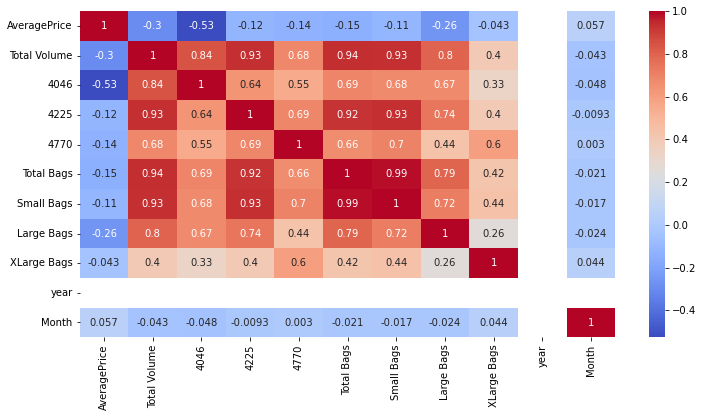

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

As we can from the heatmap above, all the Features are not correleted with the Average Price column, instead most of them are correlated with each other.

##### Making the categorical data into numercial 

In [33]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
column = ['type','region']
le = LabelEncoder()
for i in column:
    df[i] = le.fit_transform(df[i].astype(str))

print(df.dtypes)

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year            float64
region            int32
Month             int64
dtype: object


In [34]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015.0,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015.0,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015.0,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015.0,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015.0,0,11


In [35]:
y = df['AveragePrice']
df =df.drop('AveragePrice', axis=1)

In [36]:
X = df

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [38]:
x_train, x_pred, y_train, y_pred = train_test_split(X_scaler,y, test_size=0.2,random_state=55)

In [39]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,max_error

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

# LinearRegression()

In [41]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [42]:
pred_lr = lr.predict(x_pred)

In [43]:
from sklearn.metrics  import f1_score 
print(f"R2 Score: {round(r2_score(y_pred, pred_lr), 2)}")
print(f"MSE     : {round(mean_squared_error(y_pred, pred_lr), 2)}")
print(f"MAE     : {round(mean_absolute_error(y_pred, pred_lr), 2)}")
print(f"max_error     : {round(max_error(y_pred, pred_lr), 2)}")

R2 Score: 0.45
MSE     : 0.02
MAE     : 0.11
max_error     : 0.48


# Random Forest

In [44]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
pred_rf = rf.predict(x_pred)

In [46]:
from sklearn.metrics  import f1_score 
print(f"R2 Score: {round(r2_score(y_pred, pred_rf), 2)}")
print(f"MSE     : {round(mean_squared_error(y_pred, pred_rf), 2)}")
print(f"MAE     : {round(mean_absolute_error(y_pred, pred_rf), 2)}")
print(f"max_error     : {round(max_error(y_pred, pred_rf), 2)}")

R2 Score: 0.8
MSE     : 0.01
MAE     : 0.06
max_error     : 0.32


# Decision Tree 

In [47]:
df = DecisionTreeRegressor()
df.fit(x_train, y_train)
pred_df = df.predict(x_pred)

In [48]:
from sklearn.metrics  import f1_score 
print(f"R2 Score: {round(r2_score(y_pred, pred_df), 2)}")
print(f"MSE     : {round(mean_squared_error(y_pred, pred_df), 2)}")
print(f"MAE     : {round(mean_absolute_error(y_pred, pred_df), 2)}")
print(f"max_error     : {round(max_error(y_pred, pred_df), 2)}")

R2 Score: 0.63
MSE     : 0.01
MAE     : 0.08
max_error     : 0.7


### K-fold cross validation.

In [49]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(df, X_scaler,y, cv=8,scoring = 'max_error')
scores_lr = cross_val_score(lr, X_scaler,y, cv=8,scoring = 'max_error')
scores_rf = cross_val_score(rf, X_scaler,y, cv=8,scoring = 'max_error')

In [50]:
print("Decision Tree CV        : " , scores_dt.mean())
print("Linear Regression CV    : " , scores_lr.mean())
print("Random Forest   CV      : " , scores_rf.mean())

Decision Tree CV        :  -0.5931249999999999
Linear Regression CV    :  -0.43494085164598784
Random Forest   CV      :  -0.42912499999999965


### Residual for Linear Regression Model

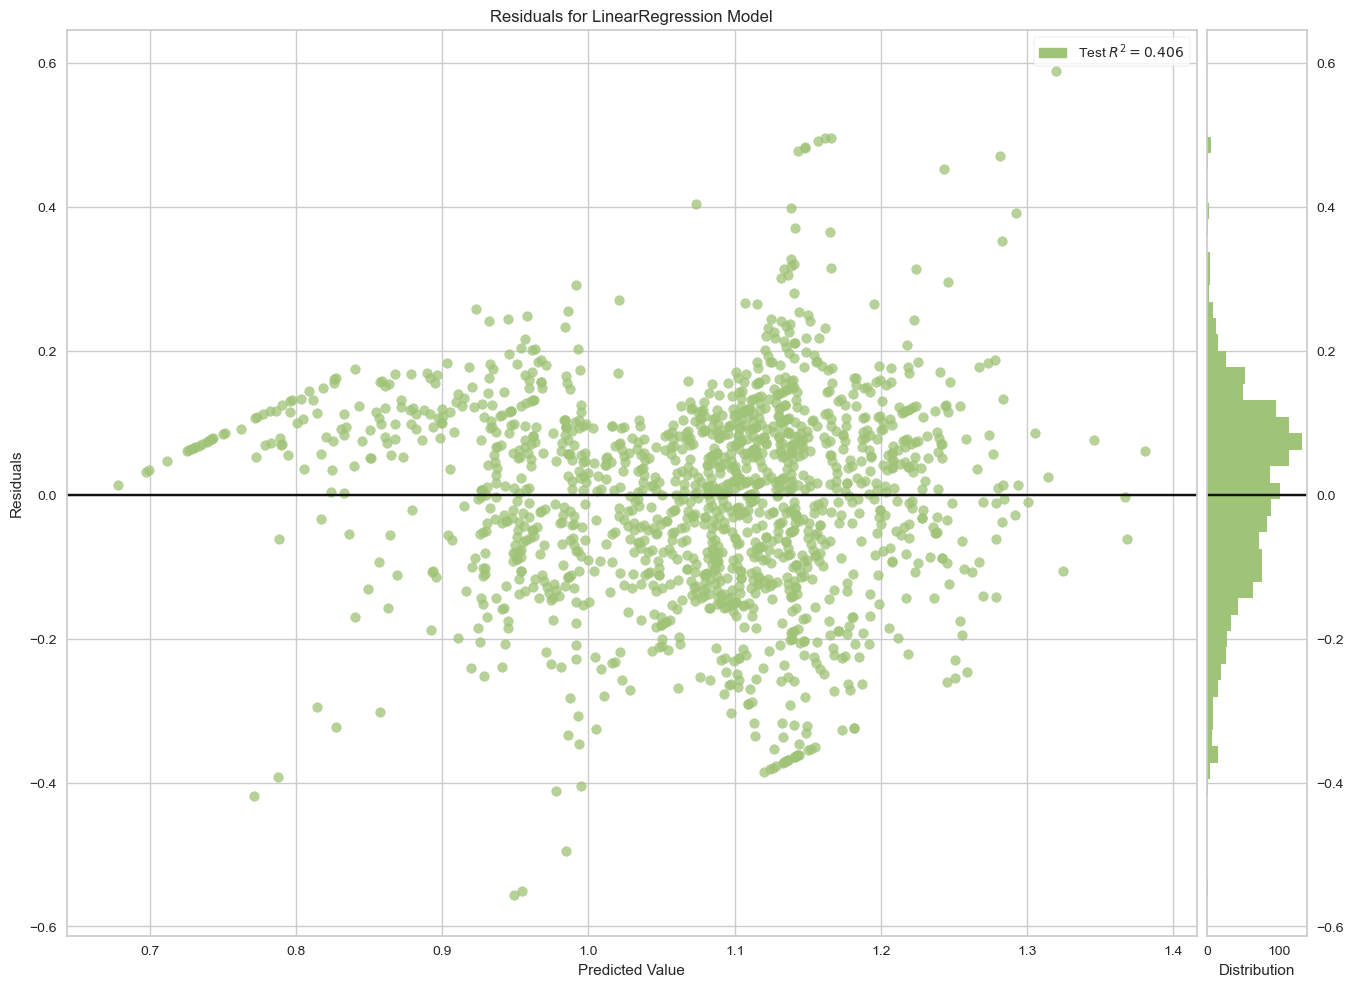

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [51]:
from yellowbrick.regressor import ResidualsPlot

fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(lr, hist = True, qqplot = False)
visualizer.score(X_scaler,y)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Residual for Decision Tree  Regressor Model

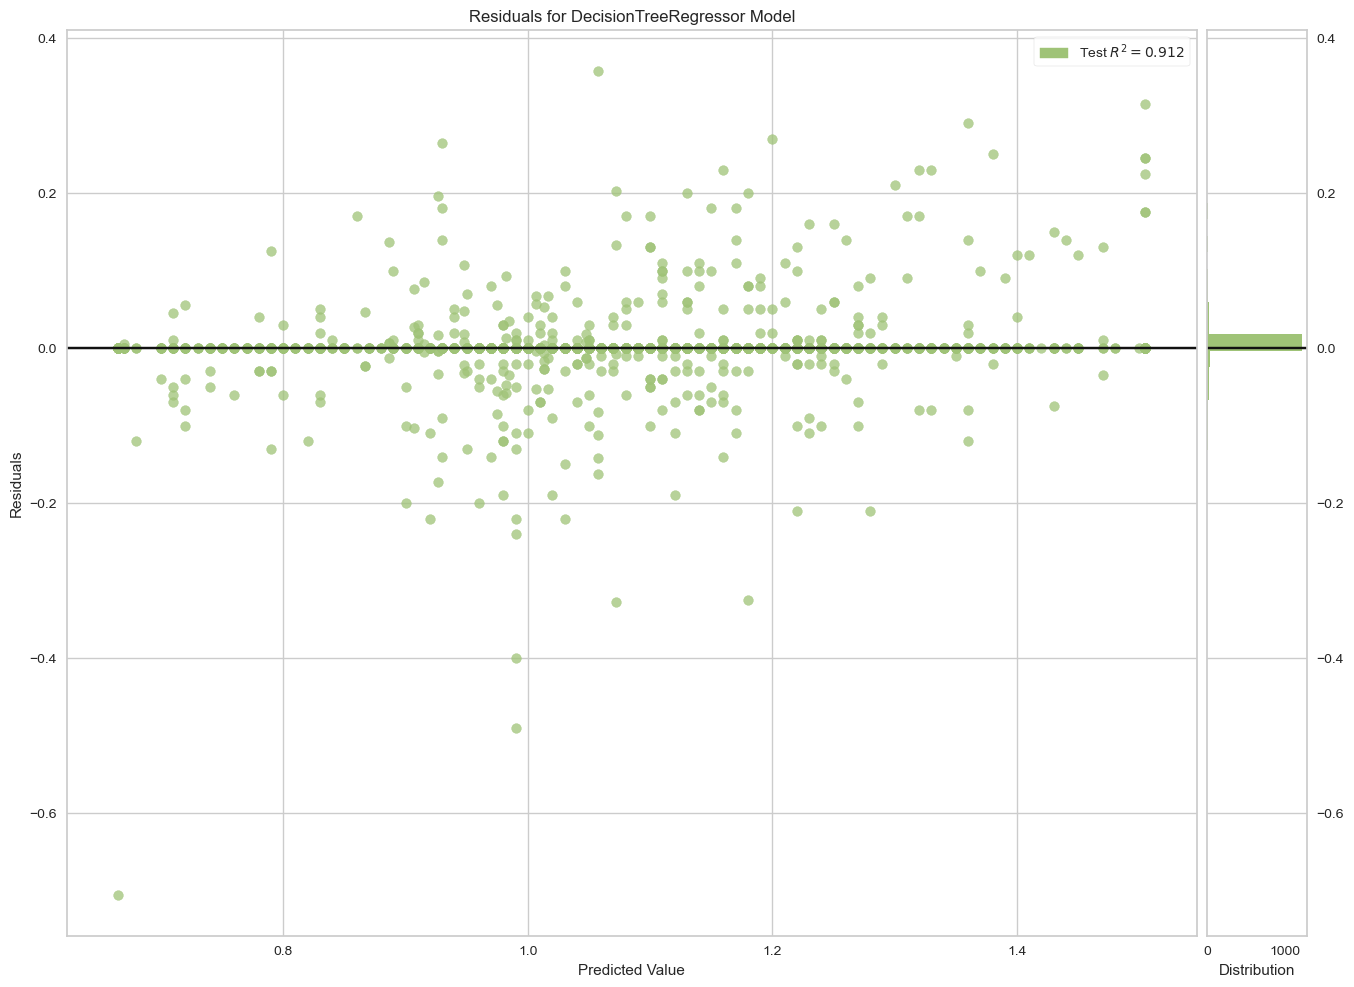

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [52]:
fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(df, hist = True, qqplot = False)
visualizer.score(X_scaler,y)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Residual for RandomForest Regressor Model



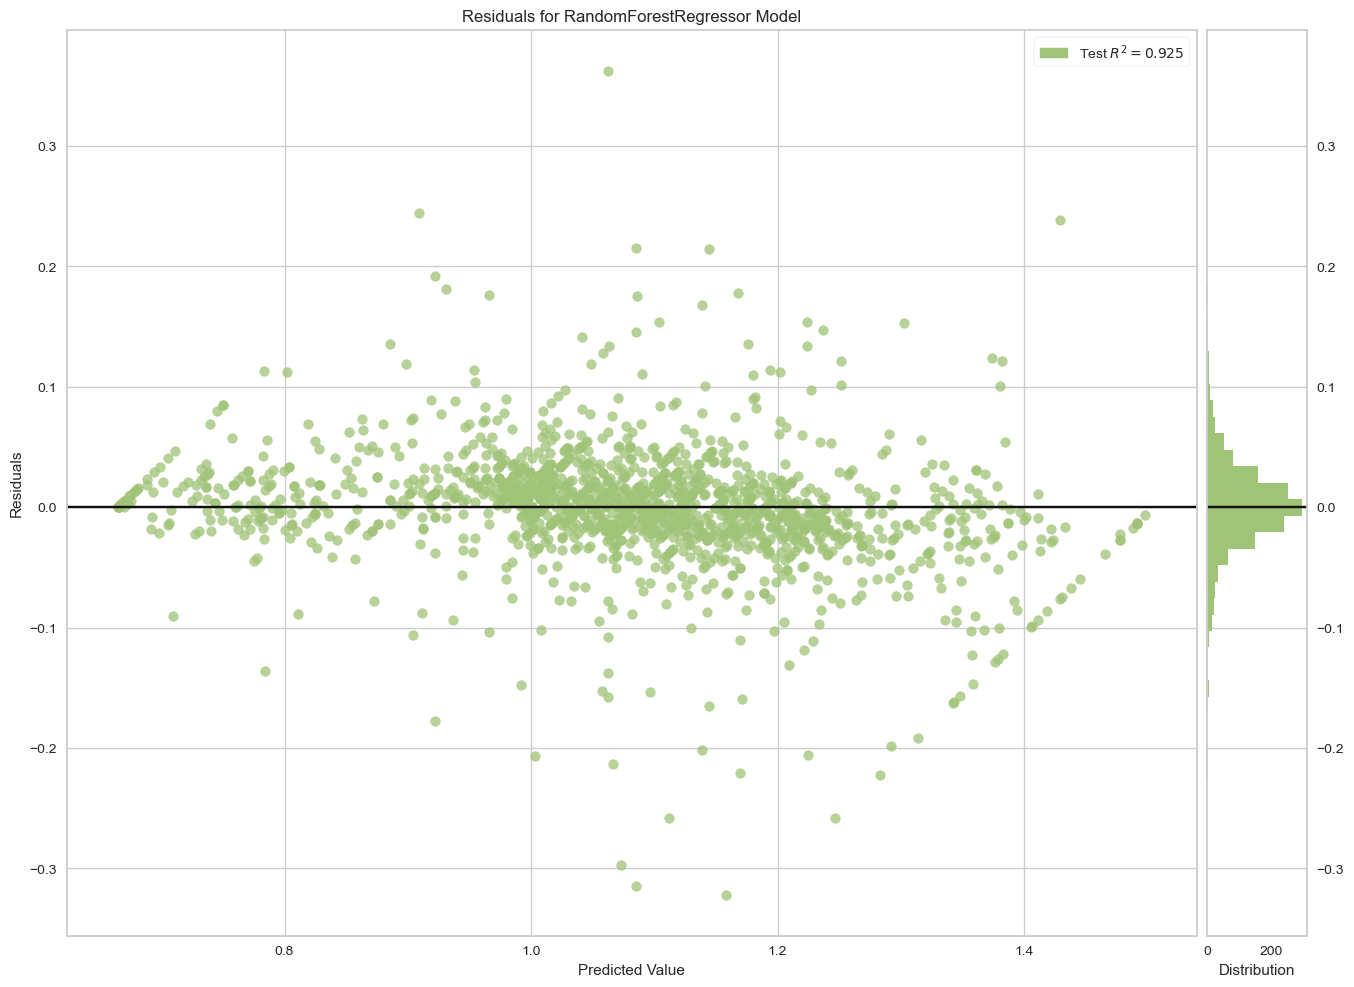

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [53]:
fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(rf, hist = True, qqplot = False)
visualizer.score(X_scaler,y)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

###### As our conclusion we proclaim that, as the basis for model selection we declare random forest model as the best suited model for our purpose of predicting average avocado prices